<h1>Image Classification using CNN</h1>
<br> From any Image

In [1]:
# Libraries 
import tensorflow as tf 
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np 


c:\Users\dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


As i don't have cuda install so it will not compatible with gpu i have the disadvantage i got will be slow and can get error of unaviable of space

<h1>Loading the images and removing the junk images


In [2]:
data_dir = "Data"
# it is the list of the extensons of images we want
imag_extension = ["jpeg","jpg","bmp",'png'] 

now i am going to the data folder and looping to the happy and sad <br> folder 
and getting the images with only the valid extensions using "os" library

In [4]:
os.listdir(data_dir) # it is returing the list of the folders 

['Happy', 'Sad']

In [5]:
os.listdir(os.path.join(data_dir,"Happy")) 
# it says that go into data folder and then into happy folder

['05-12-21-happy-people.jpg',
 '1000_F_273182118_bUqnM9i9UoyaB3gAN9XiojdNI6Mgs0tJ.jpg',
 '110754-utyeqqosky-1547658396.jpeg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1934412-happiness-1553188821.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '35438_hd.jpg',
 '7-principles-of-successful-and-happy-people.png',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '81Vk4C.jpg',
 '835405.jpg',
 '960x0.jpg',
 '9b65a25adca61c48bcb01370116723e3--happy-people-brings.jpg',
 'AOLn63HL6fnybwF0uDO6YbhtbhPkDk8IUD17NyX9i2Z7sgs64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'blog-2.jpeg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'compassion-900x387.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'file-20230208-27-3jttof.jpg',
 'friends-happy-190821.jpg',
 'friends_190412.jpg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 'GettyImages-454356720.jpg',
 'GettyImages-871518740.jpg',
 'getty_152414899_9704609

In [6]:
# testing the image 
img = cv2.imread(os.path.join("Data","Happy","physed-happiness-videoSixteenByNine3000.jpg"))
img.shape

(1686, 3000, 3)

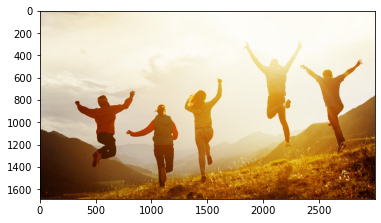

In [7]:
# showing the image using opencv
p = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(p)
plt.show()

In [8]:
# looping and removing the junk images
for image_class in os.listdir(data_dir): # going each folder in the data folder
    for image in os.listdir(os.path.join(data_dir,image_class)): # then go to each image in the folder
        image_path = os.path.join(data_dir,image_class,image) # the path of each image
        try:
            img = cv2.imread(image_path)  # opening the image
            tip = imghdr.what(image_path)  
            if(tip not in imag_extension):
                print("Image extension not valid {}",format(image_path))
                os.remove(image_path) # if the image is not valid it will remove that image(delete)
        except Exception as e:
                print("Issue with image {}",format(image_path))


tf.data.Dataset is a TensorFlow API that provides a way to represent and manipulate large datasets. It is designed to work efficiently with TensorFlow and allows you to easily load and preprocess data for machine learning models.

The purpose of tf.data.Dataset is to provide a high-level API for building scalable and efficient input pipelines for TensorFlow models. It allows you to load and transform large datasets from a variety of sources, such as text files, CSV files, and binary files. You can also use it to apply various transformations to the data, such as shuffling, batching, and repeating.

Here are some of the benefits of using tf.data.Dataset:

Performance: tf.data.Dataset is designed to work efficiently with TensorFlow and provides optimized performance for data loading and preprocessing. It can load data in parallel, prefetch batches to reduce I/O wait times, and apply transformations on the fly.

Flexibility: tf.data.Dataset supports a variety of data sources and formats, including text files, CSV files, binary files, and more. It also allows you to apply custom transformations to the data, such as data augmentation or feature engineering.

Reproducibility: tf.data.Dataset provides a consistent and reproducible way to load and preprocess data, which is important for machine learning models. It allows you to specify the same transformations for each epoch, ensuring that the input data is consistent across training runs.

Overall, tf.data.Dataset provides a convenient and efficient way to load and preprocess large datasets for machine learning models. It simplifies the process of building input pipelines and helps ensure that the input data is consistent, optimized, and reproducible.
<br>
<br>
but we are going to use keras for better pipelining





In [9]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



<h1>Data Pipeline

In [10]:
data = tf.keras.utils.image_dataset_from_directory("Data")
data

Found 1129 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
# data variabale is the generator we can not access tha data by directly iterating it 
# so we need to convert it into an array
data_iterator  = data.as_numpy_iterator()
data_iterator

In [12]:
# this code always return the next batch of the data everytime we run it
batch = data_iterator.next()
batch 


(array([[[[122.       , 110.       , 124.       ],
          [122.       , 110.       , 124.       ],
          [122.42969  , 110.42969  , 124.42969  ],
          ...,
          [100.       ,  92.       , 107.       ],
          [ 99.25781  ,  91.25781  , 106.25781  ],
          [ 99.       ,  91.       , 106.       ]],
 
         [[122.041626 , 110.041626 , 124.041626 ],
          [122.484375 , 110.484375 , 124.484375 ],
          [122.70593  , 110.70593  , 124.70593  ],
          ...,
          [100.       ,  92.       , 107.       ],
          [ 99.61731  ,  91.61731  , 106.61731  ],
          [ 99.041626 ,  91.041626 , 106.041626 ]],
 
         [[122.3551   , 110.07385  , 124.21448  ],
          [123.17688  , 110.89563  , 125.036255 ],
          [123.28125  , 111.       , 125.140625 ],
          ...,
          [100.140625 ,  92.140625 , 107.140625 ],
          [100.036255 ,  92.036255 , 107.036255 ],
          [ 99.21448  ,  91.21448  , 106.21448  ]],
 
         ...,
 
         [[1

In [13]:
print(len(batch)) 

2


2 means that we have data and labels

In [14]:
#images represented as numpy array
batch[0].shape

(32, 256, 256, 3)

(32 , 256 .256 , 3)
<br>32 is the batch size and others are the values of the images
<br> all this process was done by "keras"
,keras has also  reshape the images into the same size
<br> we can also increase or decrase the batch size 
<br> code is <br>
tf.utils.image_data_set_from_directory("data", batch_size = 8, image_size = (128,128))

In [15]:
batch[1] # it is representing the labels but 
# we did not know what does they means

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0])

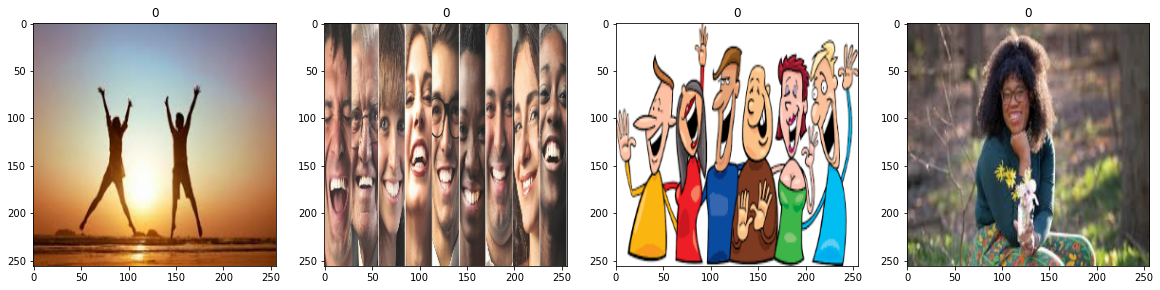

In [16]:
# code to check which label is assigned to which image 
fig , ax = plt.subplots(ncols= 4, figsize= (20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


<h3> Plot explanation</h3>
so in the above plot we can clearly see which label reprsent which picture <br>
1 -> sad <br>
0 -> happy

<h1> Pre-Processing the data</h1>
Steps<br>
1.Scale Data ->  scaling the images to between 0 and 1 is an important preprocessing step in deep learning to ensure that the input data is on a common scale and to make the images more amenable to the activation functions used in neural networks. <br> so what we will do , we divide the values with 255 so we get the value between 0 and 1
2.Split Data->


`Scaling The Data` 
<br> As we are using data pipline so we will scale the data as we load it using the datapipline capability , so 
we did not need to do it again and again 

In [17]:
# in the data pipline we have a function called map
# this allow pritcular tranformation to the data 
# it speeds up the process

data = data.map(lambda x , y : (x/255,y))

# x is the image y is the label as we want to change the value of x only 
# so we divide it by 255 
# all this will be done at the time of loading


In [18]:
# looking to the next batch
data.as_numpy_iterator().next()[0].max() # so when we load the data it will convert it 
#into the values we want

1.0

`Spliting Data`

In [19]:
len(data)
#  we have 36 batches 

36

In [20]:
# setting the size of the data
train_size = int(len(data)*.7) # 70% train data size 
val_size = int(len(data)* 0.2) # 20% set data
test_size = int(len(data)*0.1)+1 # 1% test data

In [21]:
print(train_size,val_size,test_size)
print(train_size+val_size+test_size)

25 7 4
36


`take` it is an predefined function which takes data with in the range<br>
`skip` skips the data with in the range

In [22]:
# now getting the data with in the range we have defined 
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size) 
test_data = data.skip(train_size+val_size).take(test_size)

In [23]:
print("Lenght of the Data after spliting")
print(len(train_data),len(val_data),len(test_data))

Lenght of the Data after spliting
25 7 4


<h3>Buliding the Model

In [27]:
from keras.models import Sequential 
from keras.layers import  Conv2D , MaxPooling2D, Dense, Flatten,Dropout
from keras import  models , layers

we have 2 method Sequential and Functional <br> 
Sequential -> for ease and for sequnce <br>
Functional -> for custome sequences <br>

Conv2d -> convutional layer
<br>
maxpooling layer -> condse layer
 


In [30]:
model = models.Sequential()

model.add(Conv2D(16,(3,3),1,activation = "relu",input_shape= (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation = "relu"))
model.add(MaxPooling2D())

# Conv2D(32,(3,3),1)  32 is the filter (3,3) is the filter size and 1 is the jumping point
# means the filter will move by 1 pixel each time

model.add(Conv2D(32,(3,3),1,activation = "relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))


In [31]:
model.compile("adam",loss="BinaryCrossentropy",metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)      

<h1>Training 

In [33]:
history = model.fit(train_data, epochs=20 , validation_data= val_data)

Epoch 1/20
25/25 [==============================] - 30s 1s/step - loss: 0.6589 - accuracy: 0.6313 - val_loss: 0.5716 - val_accuracy: 0.7455
Epoch 2/20
25/25 [==============================] - 30s 1s/step - loss: 0.5243 - accuracy: 0.7625 - val_loss: 0.5041 - val_accuracy: 0.7455
Epoch 3/20
25/25 [==============================] - 30s 1s/step - loss: 0.4441 - accuracy: 0.8087 - val_loss: 0.4900 - val_accuracy: 0.7768
Epoch 4/20
25/25 [==============================] - 31s 1s/step - loss: 0.4031 - accuracy: 0.8213 - val_loss: 0.4232 - val_accuracy: 0.8393
Epoch 5/20
25/25 [==============================] - 30s 1s/step - loss: 0.2997 - accuracy: 0.8875 - val_loss: 0.4198 - val_accuracy: 0.8393
Epoch 6/20
25/25 [==============================] - 31s 1s/step - loss: 0.2432 - accuracy: 0.9112 - val_loss: 0.3569 - val_accuracy: 0.8571
Epoch 7/20
25/25 [==============================] - 30s 1s/step - loss: 0.1972 - accuracy: 0.9275 - val_loss: 0.3133 - val_accuracy: 0.8750
Epoch 8/20
25/25 [==

In [38]:
import pandas as pd
hi = history.history

h = pd.DataFrame(hi)
h

,loss,accuracy,val_loss,val_accuracy
0,0.658897,0.63125,0.571597,0.745536
1,0.524258,0.76250,0.504056,0.745536
2,0.444096,0.80875,0.489977,0.776786
3,0.403115,0.82125,0.423165,0.839286
4,0.299654,0.88750,0.419782,0.839286
5,0.243235,0.91125,0.356919,0.857143
6,0.197214,0.92750,0.313323,0.875000
7,0.141730,0.95375,0.303001,0.897321
8,0.111626,0.97125,0.202917,0.933036
9,0.066449,0.98000,0.271167,0.910714


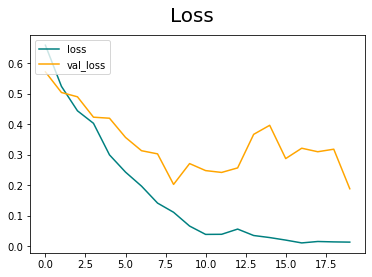

In [39]:
fig = plt.figure()
plt.plot(h['loss'],color = "teal",label = "loss")
plt.plot(h["val_loss"],color = "orange",label = "val_loss")
fig.suptitle("Loss",fontsize=20)
plt.legend(loc = 'upper left')
plt.show()

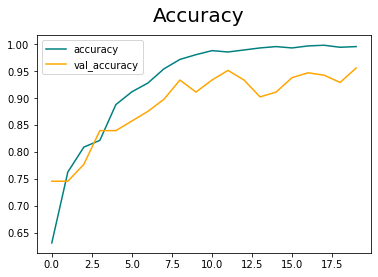

In [40]:
fig = plt.figure()
plt.plot(h['accuracy'],color = "teal",label = "accuracy")
plt.plot(h["val_accuracy"],color = "orange",label = "val_accuracy")
fig.suptitle("Accuracy",fontsize=20)
plt.legend(loc = 'upper left')
plt.show()

Evaluate Performance

In [41]:
from keras.metrics import Precision , Recall , BinaryAccuracy

In [42]:
pre = Precision()
recall = Recall()
b_acc = BinaryAccuracy()

In [43]:
# now we are testing the model on over testing data
len(test_data)

4

In [46]:
for batch in test_data.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y,yhat)
    recall.update_state(y,yhat)
    b_acc.update_state(y,yhat)
    

1/1 [==============================] - 0s 156ms/step


In [51]:
print("Precision",pre.result().numpy(),"\nRecall",recall.result().numpy(),"\nBinary Accuracy",b_acc.result().numpy())

Precision 0.9591837 
Recall 0.92156863 
Binary Accuracy 0.94285715


<h1>Testing on the custome image

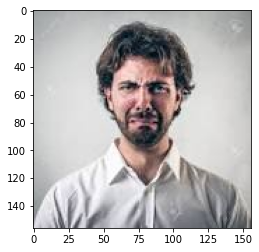

In [71]:
img = cv2.imread("sad.jpeg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()


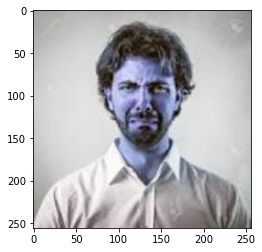

In [72]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype('int'))
plt.show()

In [73]:
resize.shape

TensorShape([256, 256, 3])

In [74]:
np.expand_dims(resize/255,0).shape
# we have just added an other dimension which will look like an batch

(1, 256, 256, 3)

In [76]:
# as our netwrok expect the batch of the image not a single image , so 
# we need to put it inside the list by using np.expand_dims()
result = model.predict(np.expand_dims(resize/255,0))
result

1/1 [==============================] - 0s 30ms/step


array([[0.9960099]], dtype=float32)

In [79]:
if result > 0.5:
    print("Sad")
elif result < 0.5:
    print("Happy")

Sad


Saving the model 

In [80]:
model.save(os.path.join("models_trained","happy_sad_image.pkl"))

INFO:tensorflow:Assets written to: models_trained\happy_sad_image.pkl\assets


INFO:tensorflow:Assets written to: models_trained\happy_sad_image.pkl\assets
